# ЗАДАНИЕ 1

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

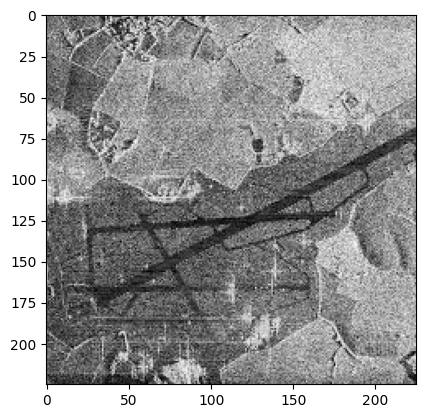

In [19]:
image = cv2.imread('sar_3.jpg', cv2.IMREAD_GRAYSCALE) 
plt.imshow(image, cmap="gray")

УЛУЧШАЕМ КОНТРАСТ для SAR изображения

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_enhanced = clahe.apply(image)

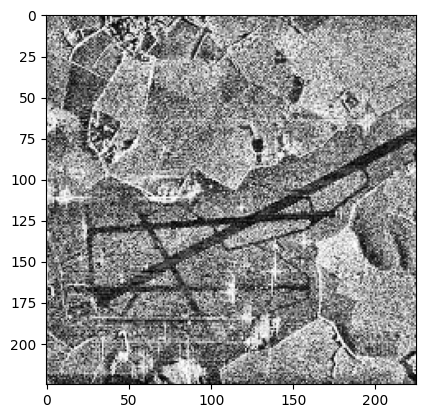

In [21]:
plt.imshow(img_enhanced, cmap="gray")

Фильтрация для подавления шума

In [22]:
img_filtered = cv2.medianBlur(img_enhanced, 5)

Выделение границ - Canny

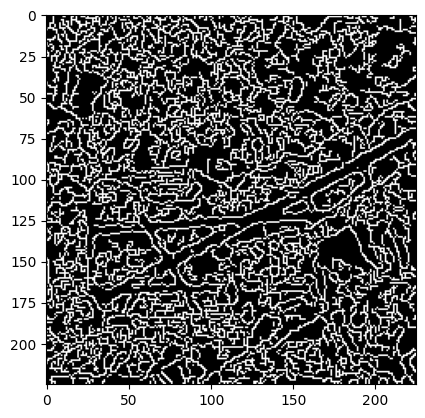

In [23]:
canny = cv2.Canny(img_filtered, 50, 150, apertureSize=3)
plt.imshow(canny, cmap="gray")

Преобразования Хафа для линий

In [24]:
lines = cv2.HoughLinesP(canny, 
                           rho=1, 
                           theta=np.pi/180, 
                           threshold=130, 
                           minLineLength=50, 
                           maxLineGap=10)

Поиск самой длинной линии

In [25]:
longest_line = None
max_length = 0
    
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            
        if length > max_length:
            max_length = length
            longest_line = line[0]

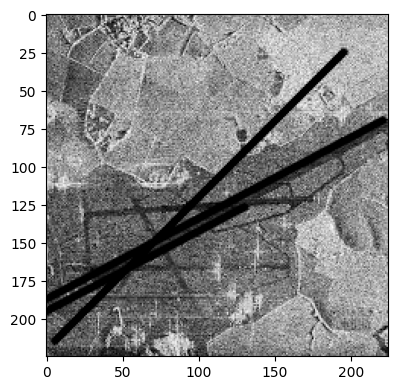

In [26]:
result = image.copy()
    
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0] 
        cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 3, cv2.LINE_AA)
        
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [27]:
if longest_line is not None:
    x1, y1, x2, y2 = longest_line
    cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    print(f"Длина самой протяженной линии: {max_length:.2f} пикселей")

Длина самой протяженной линии: 270.11 пикселей


# ЗАДАНИЕ 2

точечная бинаризация

In [28]:
import copy

bin_img = copy.deepcopy(image)
T  = 50
bin_img[image < T] = 0
bin_img[image >= T] = 255

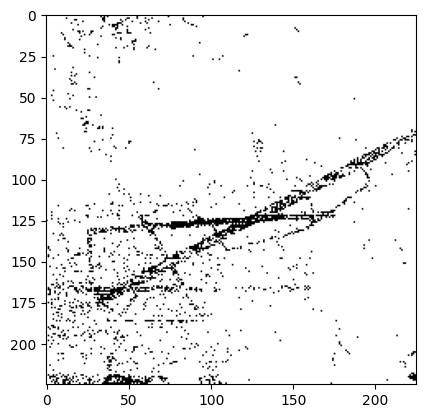

In [29]:
plt.imshow(bin_img, cmap="gray")

Оцу бинаризация

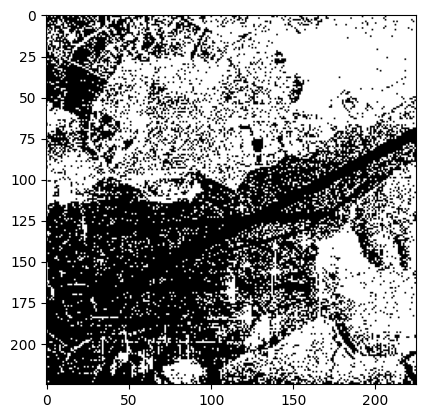

In [30]:
_,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

адаптивная бинаризация

In [31]:
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)

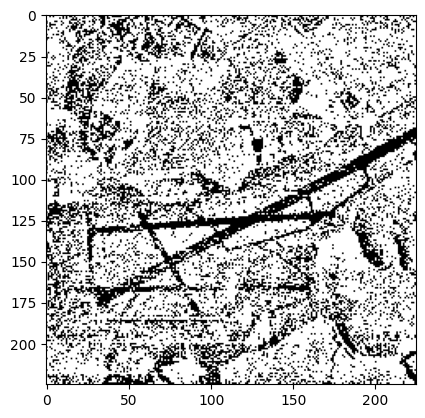

In [32]:
plt.imshow(th3, cmap="gray")

обьединение результатов

In [33]:
combined_binary = cv2.bitwise_or(bin_img, th2)
combined_binary = cv2.bitwise_or(combined_binary, th3)

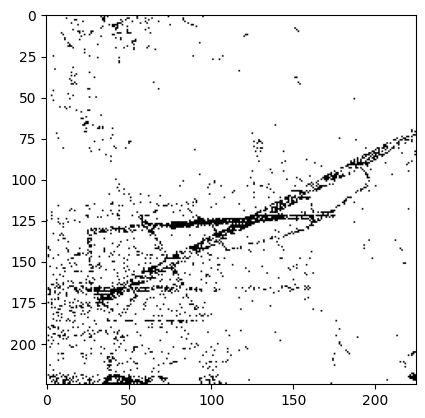

In [34]:
plt.imshow(combined_binary, cmap="gray")

In [35]:
inverted_binary = cv2.bitwise_not(combined_binary)
contours, _ = cv2.findContours(inverted_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_sorted = sorted(contours, key=cv2.contourArea, reverse=True)

num_contours_to_keep = 50  
large_contours = contours_sorted[:num_contours_to_keep]
road_mask = np.zeros_like(inverted_binary)
cv2.fillPoly(road_mask, large_contours, 255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(225, 225), dtype=uint8)

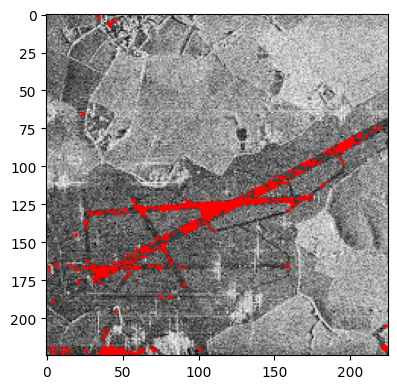

In [36]:
plt.figure(figsize=(12, 4))

original = cv2.imread('sar_3.jpg', cv2.IMREAD_GRAYSCALE) 
original_with_road = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
original_with_road[road_mask == 255] = [0, 0, 255]  
plt.imshow(cv2.cvtColor(original_with_road, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()